# Script Paracaidista-Errores

Cálculo de velocidad de manera analítica, velocidad por métodos numéricos, error verdadero, error relativo porcentual verdadero, y error aproximado.

                             CAIDA LIBRE: PARACAIDISTA               

  Tiempo    Velocidad Real    Velocidad Aprox    Err. Verd    Err. Porc     Err. Aprox
--------  ----------------  -----------------  -----------  -----------  -------------
       0            0                  0        0            0             0
       2           16.405             19.6      3.19502     16.3011      100
       4           27.7693            32.0047   4.23541     13.2337       38.759
       6           35.6418            39.8555   4.21379     10.5727       19.6983
       8           41.0953            44.8243   3.729        8.31916      11.0849
      10           44.8731            47.969    3.09583      6.45382       6.55566
      12           47.4902            49.9592   2.46902      4.94208       3.98374
      14           49.3031            51.2188   1.91571      3.74025       2.45928
      16           50.559             52.016    1.45703      2.80112       1.5326
      18           51.429

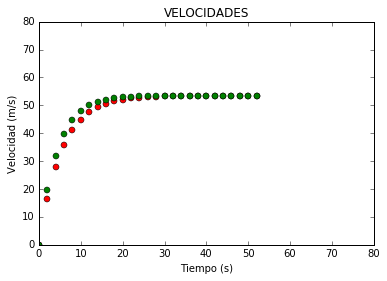


-VELOCIDAD ANALÍTICA EN ROJO
-VELOCIDAD APROXIMADA EN VERDE



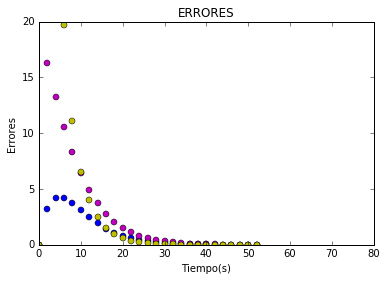


-ERROR VERDADERO EN AZUL
-ERROR RELATIVO PORCENTUAL VERDADERO EN MORADO
-ERROR APROXIMADO EN AMARILLO



In [78]:
from tabulate import tabulate 
import math 
import matplotlib.pyplot as plt 
%matplotlib inline

g, c, m, vA, Es, vel, Erv, Erpv= 9.8, 12.5, 68.1, 0.0, 0.00005, 0.0, 0.0, 0.0
velAn = []
velAprx = []
tiempo = []
Ev = []
Epv = []
Ea=[]
tab=[]
t, i,t1, t2, j = 0, 0, 0, 2, 0
Eaprox= 100.0 
nu=5

while(abs(0.5*pow(10,2-nu))<Eaprox ):
    #Velocidad analitica
    tiempo.append(t)
    i=t/2
    vA=((g*m)/c)*(1-math.exp(-(c/m)*tiempo[i]))
    velAn.append(vA)
    #Velocidad Aproximada
    if(t==0):
        v=0.0
        velAprx.append(v)
    else: 
        v = vel +(g-(c/m)*vel)*(t2-t1)
        vel=v
        t1=t2
        t2=t1+2
        velAprx.append(v)
        
    t+=2
    #Error verdadero
    Erv=math.fabs(velAn[i]-velAprx[i])
    Ev.append(Erv)
    #Error relativo porcentual verdadero
    if velAprx[i]==0: 
        Erpv=0.0
        Epv.append(Erpv)
    
    else:
        Erpv=(Ev[i]/velAprx[i])*100
        Epv.append(Erpv)
    
    #Error aproximado
    if velAn[i]==0:
        Eaprox = 0.0
        Ea.append(Eaprox)
        Eaprox=100.0
     
    else:
        j=i-1
        Eaprox=math.fabs(((velAprx[i]-velAprx[j])*100)/velAprx[i])
        Ea.append(Eaprox)
    
    #Mostrando en tablas 
    tab.append([tiempo[i],velAn[i],velAprx[i],Ev[i],Epv[i],Ea[i]])

print "                             CAIDA LIBRE: PARACAIDISTA               \n"
print tabulate(tab,headers=["Tiempo","Velocidad Real", "Velocidad Aprox","Err. Verd","Err. Porc", "Err. Aprox"])

plt.title("VELOCIDADES")
plt.axis([0,80,0,80])
plt.ylabel('Velocidad (m/s)')
plt.xlabel('Tiempo (s)')
plt.plot([tiempo[0:]],[velAn[0:]], ':ro')
plt.plot([tiempo[0:]],[velAprx[0:]], ':go')
plt.show()
print "\n-VELOCIDAD ANALÍTICA EN ROJO\n-VELOCIDAD APROXIMADA EN VERDE\n"

plt.title("ERRORES")
plt.axis([0,80,0,20])
plt.ylabel('Errores')
plt.xlabel('Tiempo(s)')
plt.plot([tiempo[0:]],[Ev[0:]], 'bo')
plt.plot([tiempo[0:]],[Epv[0:]], 'mo')
plt.plot([tiempo[0:]], [Ea[0:]], 'yo')
plt.show()    
print "\n-ERROR VERDADERO EN AZUL\n-ERROR RELATIVO PORCENTUAL VERDADERO EN MORADO\n-ERROR APROXIMADO EN AMARILLO\n"